# Support Vector Machine(SVM)

教師なしの機械学習には、一番最初にとうじょうするのはSVMになります。

簡単に言うと、特徴量が2つしかない2次元データのデータセットがある場合、対象のデータセットをクラスの応じて最も適切に分割する直線を見つけるという処理を行なってくれる学習になります。

アルゴリズムの名前にも出てくるSupport Vectorとは、そのデータセットを分割する直線に最も近いデータ**点**のことを指します。

境界による分割されたそれぞれのクラスで、その直線に最も近いデータ点(Support Vector)を考え、そのデータ点と直線との距離(マージン)が、できるだけ大きくなるように直線を決定します。

損失関数(ここで、xは予測結果で、aは目標値になります): 

- 二乗損失: $ f(x) = (x - a ) ^ 2 $。

- ヒンジ関数: $f(x) = max(x, x-a) $。


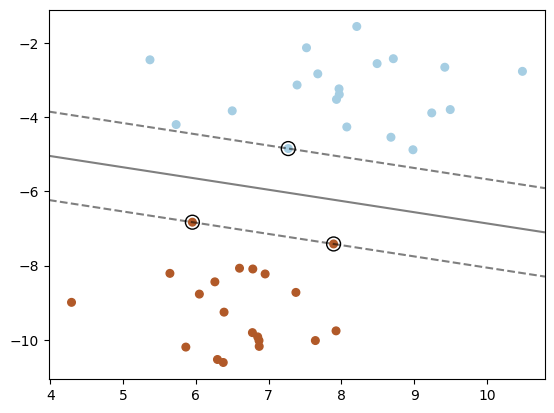

<Figure size 640x480 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# 分類データ生成
# n_samples: ランダムデータの数
# centers: 塊の数
# x: 生成データの座標
# y: 各点の種別番号(0 ~ 1)
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# サポートベクターマシーンを利用します
# kernel='linear'はヒンジ損失
# Cが大きいほど正則化は効果が無くなる
# clf: classifier(分類器)の略
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)
#分類データを描画。
# c: 色種別
# s: 点のサイズ
# cmap: カラリング設定
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# グラフ全体の枠の描画
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 30x30の格子を作る
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
# 分類器にあるデータを、各格子で定義し直す分類
Z = clf.decision_function(xy).reshape(XX.shape)

# 等高線を使って決定境界を描画 level=0がそれにあたる
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# マージンが一番小さいサポートベクタを描画
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()
plt.clf()

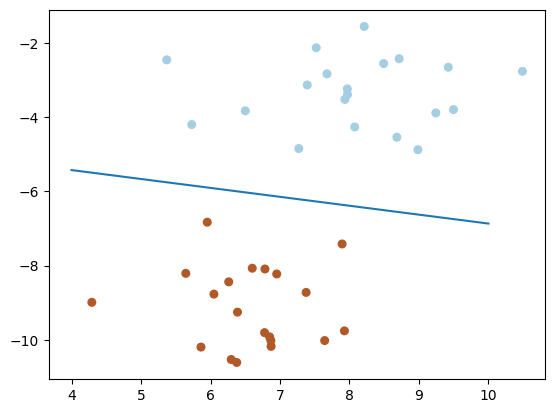

<Figure size 640x480 with 0 Axes>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.datasets import make_blobs

# ignore warning message
import warnings
warnings.filterwarnings('ignore')

# random_stateで、上と同じデータセットを作成
X, y = make_blobs(n_samples=40, centers=2, random_state=6)
# yの値{0, 1} -> {-1,1}にする
y = y*2-1
# 二乗損失
clf = linear_model.LinearRegression(fit_intercept=True,normalize=True,copy_X=True)
clf.fit(X, y)
#分類データを描画。cmapの部分で色を勝手に決めてくれる
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# 決定境界の描画
x_plot = np.linspace(4,10,100)
w = [clf.intercept_,clf.coef_[0],clf.coef_[1]]
y_plot = -(w[1]/w[2]) * x_plot - w[0]/w[2] # 下方で説明
plt.plot(x_plot,y_plot)
plt.show()
plt.clf()

横軸を $x_1$ 縦軸を $x_2$ とすると、

境界線の方程式は：

$$ y = w_0 + w_1 * x_1 + w2 * x_2 $$

それぞれの分類において、 $ y = -1, 1 $ に修正したため、決定境界では $ y=0 $ となります

よって決定境界の式は：

$$ 0 = w_0 + w_1 * x_1 + w2 * x_2 $$

$$ x_2 = - \frac{w_0}{w_2} - \frac{w_1}{w_2} * x_1 $$


大きな外れ値が無い場合はヒンジ損失でも二乗損失でも同じような結果を得ることが出来ます。